In [0]:
#Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [14]:
dataset = pd.read_csv('nba-players_stats-20142015.csv')

#Take MIN(minute played) and PTS(points) column
data = dataset.iloc[:, [2,3]].values

              Name  Games Played   MIN   PTS  ...  Pos  Team  Weight        BMI
0         AJ Price            26   324   133  ...   PG   PHO   81.45  23.798393
1     Aaron Brooks            82  1885   954  ...   PG   CHI   72.45  22.361111
2     Aaron Gordon            47   797   243  ...   PF   ORL   99.00  24.142661
3    Adreian Payne            32   740   213  ...   PF   ATL  106.65  25.377751
4       Al Horford            76  2318  1156  ...    C   ATL  110.25  26.234384
..             ...           ...   ...   ...  ...  ...   ...     ...        ...
485   Xavier Henry             9    86    20  ...   SF   LAL   99.00  26.035503
486    Zach LaVine            77  1902   778  ...   PG   MIN   85.05  22.951594
487  Zach Randolph            71  2304  1143  ...   PF   MEM  117.00  28.532236
488  Zaza Pachulia            73  1730   606  ...    C   MIL  121.50  28.218900
489   Zoran Dragic            16    75    28  ...   SG   PHO   90.00  24.287401

[490 rows x 34 columns]


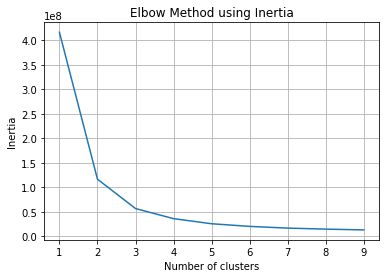

In [15]:
inertia = []
N = range(1,10)
for i in N:
  kmeans = KMeans(n_clusters=i, init = 'k-means++',random_state=0)
  kmeans.fit(data)
  inertia.append(kmeans.inertia_)
plt.plot(N, inertia)
plt.title('Elbow Method using Inertia')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.grid()
plt.show()

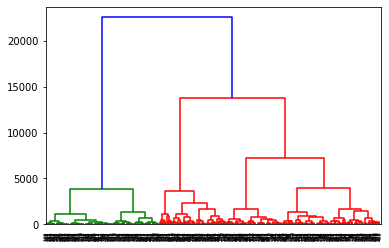

In [16]:
dendrogram = sch.dendrogram(sch.linkage(data, method = 'ward'))

In [0]:
hc = AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage = 'ward')

In [0]:
predict = hc.fit_predict(data)

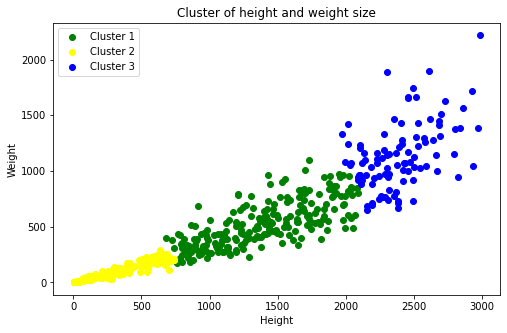

In [21]:
plt.rcParams["figure.figsize"] = (8,5)
colors = ["green", "yellow", "blue"]
for i in range(3):
  plt.scatter(data[predict == i,0], data[predict == i,1], c = colors[i], label = 'Cluster '+str(i+1))
plt.title("Cluster of height and weight size")
plt.xlabel("Height")
plt.ylabel("Weight")
plt.legend(loc="best")
plt.show()